## Вариант 13

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Требуется решить задачу Коши для приведённой системы дифференциальных уравнений первого порядка:

$\frac{dx}{dt} = F_{x}(x, y)$, $\frac{dy}{dt} = F_{y}(x, y)$

методом Рунге-Кутты второго либо четвёртого порядка точности. Начальные условия:

$x(t_{0}) = x_{0}$, $y(t_{0}) = y_{0}$

Строить решение нужно до преодоления параметром $t$ точки $t_{0}$.
Относительная точность должна быть не хуже $10^{-5}$

Система уравнений:

$x^\prime = 2e^t + 2x + y$

$y^\prime = x + 2y - 3e^{4t}$

Начальные условия:

$x(t_{0}) = 2$, $y(t_{0}) = 0$

$t_{0} = 0, t_{1} = -2$

In [2]:
def F1(t, x, y):
    return 2*np.exp(t) + 2*x + y

def F2(t, x, y):
    return x + 2*y - 3*np.exp(4*t)

Метод Рунге-Кутты четвертого порядка точности: 

In [3]:
def R_G(low, high, h):
    t = []
    xi = []
    yi = []
    xi.append(2)
    yi.append(3)
    t.append(low)
    low += h
    i = 1
    while round(low, 4) <= high:
        # X
        k1_x = h * F1(low, xi[i - 1], yi[i - 1])
        k2_x = h * F1(low + h / 2, xi[i - 1] + k1_x / 2, yi[i - 1] + k1_x / 2)
        k3_x = h * F1(low + h / 2, xi[i - 1] + k2_x / 2, yi[i - 1] + k2_x / 2)
        k4_x = h * F1(low + h, xi[i - 1] + k3_x, yi[i - 1] + k3_x)
        xi.append(xi[i - 1] + (k1_x + 2 * k2_x + 2 * k3_x + k4_x) / 6)
        # Y
        k1_y = h * F2(low, xi[i - 1], yi[i - 1])
        k2_y = h * F2(low + h / 2, xi[i - 1] + k1_y / 2, yi[i - 1] + k1_y / 2)
        k3_y = h * F2(low + h / 2, xi[i - 1] + k2_y / 2, yi[i - 1] + k2_y / 2)
        k4_y = h * F2(low + h / 2, xi[i - 1] + k3_y, yi[i - 1] + k3_y)
        yi.append(yi[i - 1] + (k1_y + 2 * k2_y + 2 * k3_y + k4_y) / 6)
        
        t.append(low)
        low += h
        i += 1
    return t, xi, yi 

In [4]:
array_points = R_G(0, -2, 0.1)

In [5]:
data = pd.DataFrame(index = ['t', 'x', 'y'], 
                   data = [array_points[0], array_points[1], array_points[2]]).T

Полученные точки прирешении системы ДУ:

In [6]:
data

,t,x,y
0,0,2,3


Построим график траеторий, порождённой этой последовательностью точек:

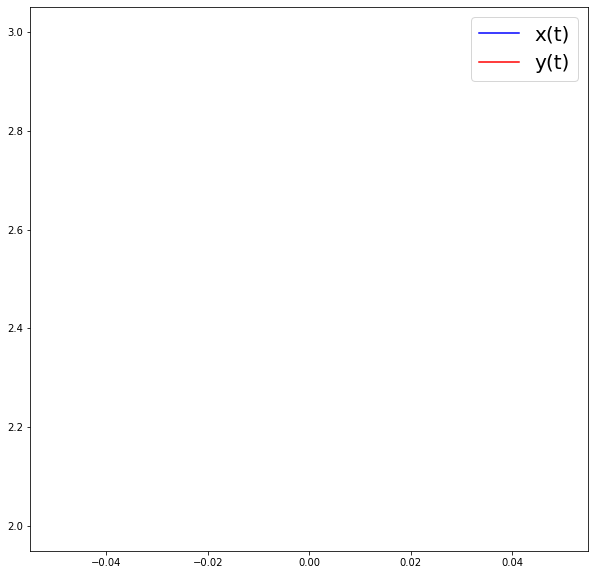

In [7]:
plt.figure(figsize(10, 10))
plt.plot(array_points[0], array_points[1], color = 'b', label = 'x(t)')
plt.plot(array_points[0], array_points[2], color = 'r', label = 'y(t)')
plt.legend(prop={'size': 20})
plt.show()

Правило Рунге оценки погрешности:

In [8]:
array_exp = R_G(0, -2, 0.05)

exp = []
for i, x in enumerate(array_exp[1]):
    if i % 2 == 0 or i == len(array_exp[1]) - 1:
        exp.append(x)
        
e = []
for i in range(len(exp)):
    e.append( abs(array_points[1][i] - exp[i]) / 3 )

In [9]:
e

[0.0]

Решим символьно систему и построим решение:

In [10]:
def f_x(t):
    return 41 / (5 * 18) * np.exp(-3 * t) * (6 * np.exp(5 * t) - 1) - (2 * 37) / (5 * 12) * np.exp(-3 * t) * (np.exp( 5 * t) - 1) - 2 * t / 3 - 5 / 18

def f_y(t):
    return (3 * 41) / (5 * 18) * np.exp(-3 * t) * (np.exp(5 * t) - 1) - 37 / (5 * 12) * np.exp(-3 * t) * (np.exp(5 * t) - 6) + 1 / 12 * (-6 * t - 1)

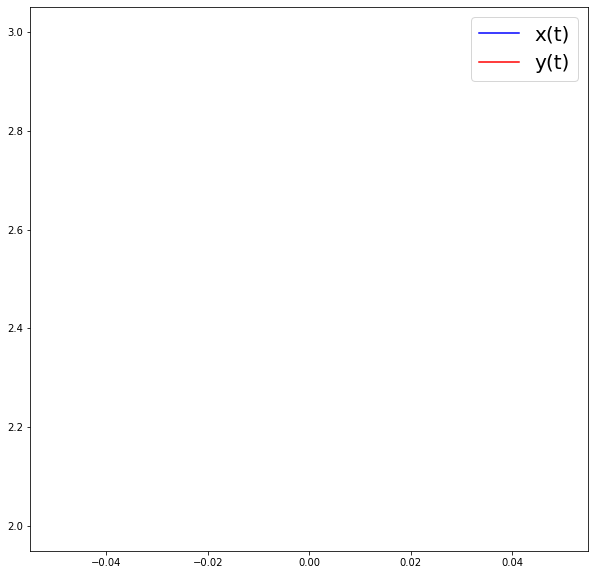

In [11]:
plt.figure(figsize(10, 10))
plt.plot(array_points[0], array_points[1], color = 'b', label = 'x(t)')
plt.plot(array_points[0], array_points[2], color = 'r', label = 'y(t)')

plt.plot(array_points[0], [f_x(i) for i in array_points[0]], color = 'black')
plt.plot(array_points[0], [f_y(i) for i in array_points[0]], color = 'black')

plt.legend(prop={'size': 20})
plt.show()